In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
import numpy as np


    


def get_pages():
    urls = [f"https://basketball.realgm.com/nba/stats/2023/Averages/Qualified/points/All/desc/{i}/Regular_Season" for i in range(1,5)]
    
    html = requests.get(urls[0]).content
    time.sleep(random.uniform(1,3))
    soup = BeautifulSoup(html, 'html.parser')

    table = soup.find_all('table', {"data-tablesaw-mode":"swipe"})[0]
    stats = [stat.text for stat in table.find('thead').find_all('th')][1:]
    stats_df = pd.DataFrame(columns=stats)

    for url in urls:
        html = requests.get(url).content
        time.sleep(random.uniform(1,3))
        soup = BeautifulSoup(html, 'html.parser')
        
        try:
            table = soup.find_all('table', {"data-tablesaw-mode":"swipe"})[0]
        except Exception:
            break
        else:
            player_stats_list = []
            rows = table.find('tbody').find_all('tr')
            for row in rows:
                player_stats = row.getText(separator='***').split('***')[1:]
                player_stats_list.append(player_stats)


            stats_df = pd.concat([stats_df, pd.DataFrame(player_stats_list, columns=stats)])
        
    return stats_df

        


data_df = get_pages()

In [2]:
data = data_df.copy()

for column in data.columns[2:]:
    data[column] = [float(point) for point in data[column]]

data

,Player,Team,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,Luka Doncic,DAL,9.0,36.8,36.0,12.2,23.3,0.524,2.4,8.2,...,11.7,0.781,1.0,7.4,8.4,8.3,1.9,0.6,3.6,3.4
1,Stephen Curry,GSW,10.0,35.1,32.6,10.8,21.1,0.512,5.3,12.3,...,6.1,0.934,0.8,6.3,7.1,6.9,1.1,0.1,2.6,2.1
2,Giannis Antetokounmpo,MIL,9.0,32.7,31.8,11.4,21.1,0.542,0.9,3.3,...,12.3,0.649,1.9,10.3,12.2,5.3,1.1,1.4,3.3,2.9
3,Donovan Mitchell,CLE,9.0,39.3,31.2,10.8,21.3,0.505,4.1,9.1,...,6.4,0.862,0.9,3.2,4.1,6.0,1.3,0.7,3.4,3.2
4,Jayson Tatum,BOS,10.0,37.7,31.2,10.0,20.1,0.498,3.4,9.2,...,8.9,0.876,0.8,6.7,7.5,4.0,0.8,1.5,2.7,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Davon Reed,DEN,7.0,6.4,1.3,0.4,1.6,0.273,0.3,0.7,...,0.3,0.500,0.0,0.6,0.6,0.1,0.4,0.0,1.0,0.7
95,"Paul Reed, Jr.",PHI,8.0,7.1,0.8,0.4,1.0,0.375,0.0,0.0,...,0.0,0.000,0.4,1.3,1.6,0.1,1.3,0.4,0.4,1.5
96,KZ Okpala,SAC,6.0,6.4,0.5,0.2,0.8,0.200,0.2,0.7,...,0.0,0.000,0.3,0.7,1.0,0.3,0.0,0.0,0.0,0.7
97,Jaxson Hayes,NOP,5.0,7.4,0.4,0.2,1.0,0.200,0.0,0.4,...,0.4,0.000,0.2,0.8,1.0,0.6,0.2,0.2,0.2,1.0


Get Player Positions

In [3]:
def get_positions():
    url = "https://basketball.realgm.com/nba/players"
    html = requests.get(url).content
    time.sleep(random.uniform(1,3))
    soup = BeautifulSoup(html, 'html.parser')

    table_class = soup.find_all("table", {"data-tablesaw-mode": "swipe"})[0].find("tbody")
    rows = table_class.find_all("tr")

    player_positions = { rows[i].find("td", {"data-th": "Player"}).text: rows[i].find("td", {"data-th": "Pos"}).text
                         for i in range(len(rows)) }
    
    positions = []
    for player in data['Player']:
        try:
            position = player_positions[player]
        except Exception:
            position = None
        finally:
            positions.append(position)

    data['Position'] = positions

get_positions()

In [6]:
df = data.copy()


df['Position'][df['Position'].isin(['SF','PF'])] = 'F'
df['Position'][df['Position'].isin(['SG','PG'])] = 'G'

df

/var/folders/06/kvt42vp15b106w3b8f5s1k540000gn/T/ipykernel_40575/3143684209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][df['Position'].isin(['SF','PF'])] = 'F'
/var/folders/06/kvt42vp15b106w3b8f5s1k540000gn/T/ipykernel_40575/3143684209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][df['Position'].isin(['SG','PG'])] = 'G'


,Player,Team,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Position
0,Luka Doncic,DAL,9.0,36.8,36.0,12.2,23.3,0.524,2.4,8.2,...,0.781,1.0,7.4,8.4,8.3,1.9,0.6,3.6,3.4,F
1,Stephen Curry,GSW,10.0,35.1,32.6,10.8,21.1,0.512,5.3,12.3,...,0.934,0.8,6.3,7.1,6.9,1.1,0.1,2.6,2.1,G
2,Giannis Antetokounmpo,MIL,9.0,32.7,31.8,11.4,21.1,0.542,0.9,3.3,...,0.649,1.9,10.3,12.2,5.3,1.1,1.4,3.3,2.9,F
3,Donovan Mitchell,CLE,9.0,39.3,31.2,10.8,21.3,0.505,4.1,9.1,...,0.862,0.9,3.2,4.1,6.0,1.3,0.7,3.4,3.2,G
4,Jayson Tatum,BOS,10.0,37.7,31.2,10.0,20.1,0.498,3.4,9.2,...,0.876,0.8,6.7,7.5,4.0,0.8,1.5,2.7,1.9,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Davon Reed,DEN,7.0,6.4,1.3,0.4,1.6,0.273,0.3,0.7,...,0.500,0.0,0.6,0.6,0.1,0.4,0.0,1.0,0.7,F
95,"Paul Reed, Jr.",PHI,8.0,7.1,0.8,0.4,1.0,0.375,0.0,0.0,...,0.000,0.4,1.3,1.6,0.1,1.3,0.4,0.4,1.5,F
96,KZ Okpala,SAC,6.0,6.4,0.5,0.2,0.8,0.200,0.2,0.7,...,0.000,0.3,0.7,1.0,0.3,0.0,0.0,0.0,0.7,G
97,Jaxson Hayes,NOP,5.0,7.4,0.4,0.2,1.0,0.200,0.0,0.4,...,0.000,0.2,0.8,1.0,0.6,0.2,0.2,0.2,1.0,F


Graphing all combonations of features to check for correlation or covariability

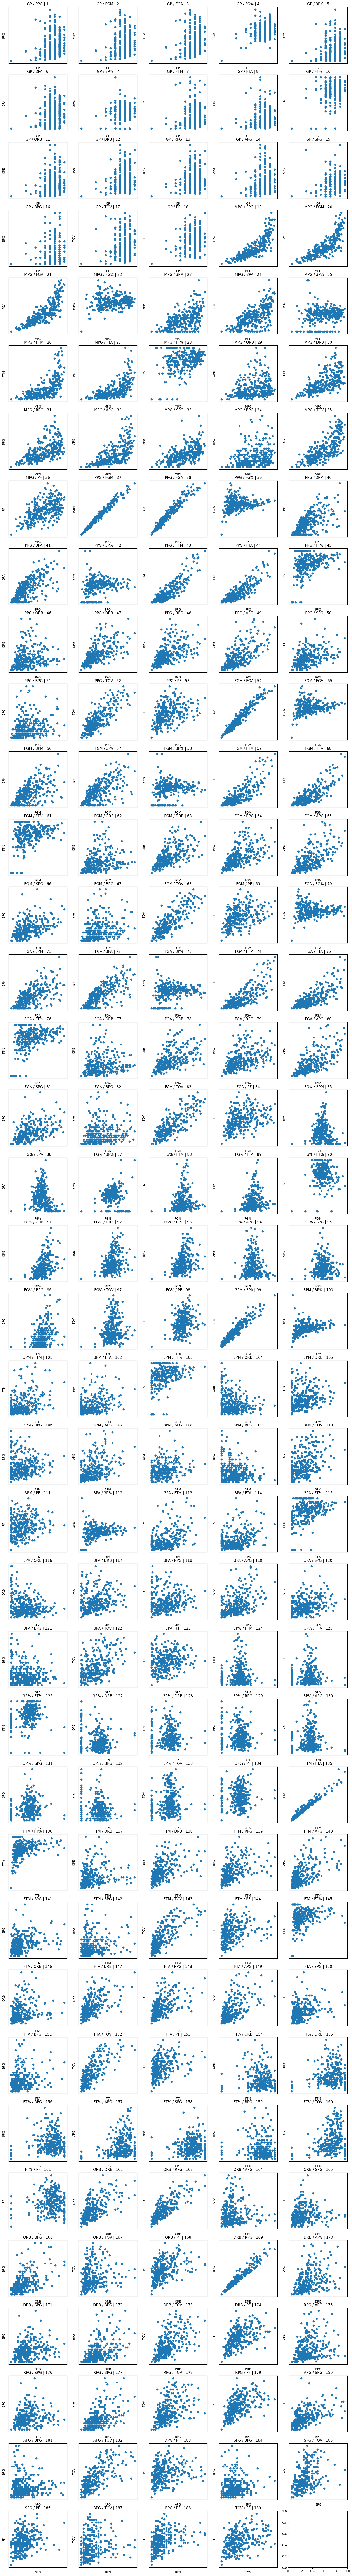

In [147]:
import matplotlib.pyplot as plt

all_features = df.columns[2:-1]


combos = []
for x in range(len(all_features)):
    for y in range(x+1,len(all_features)):
        combos.append((all_features[x],all_features[y]))


fig = plt.figure(figsize=(20,152))

fig_rows = 38
fig_cols = 5

for i in range(1,fig_rows*fig_cols+1):
    try:
        ax = fig.add_subplot(fig_rows,fig_cols,i)
        ax.scatter(df[combos[i][0]],df[combos[i][1]])
    except Exception:
        break
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none')
        plt.xlabel(combos[i][0])
        plt.ylabel(combos[i][1])
        ax.set_title(f"{combos[i][0]} / {combos[i][1]} | {i}")

plt.show()

In [225]:
df[all_features]

,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,9.0,36.8,36.0,12.2,23.3,0.524,2.4,8.2,0.297,9.1,11.7,0.781,1.0,7.4,8.4,8.3,1.9,0.6,3.6,3.4
1,10.0,35.1,32.6,10.8,21.1,0.512,5.3,12.3,0.431,5.7,6.1,0.934,0.8,6.3,7.1,6.9,1.1,0.1,2.6,2.1
2,9.0,32.7,31.8,11.4,21.1,0.542,0.9,3.3,0.267,8.0,12.3,0.649,1.9,10.3,12.2,5.3,1.1,1.4,3.3,2.9
3,9.0,39.3,31.2,10.8,21.3,0.505,4.1,9.1,0.451,5.6,6.4,0.862,0.9,3.2,4.1,6.0,1.3,0.7,3.4,3.2
4,10.0,37.7,31.2,10.0,20.1,0.498,3.4,9.2,0.370,7.8,8.9,0.876,0.8,6.7,7.5,4.0,0.8,1.5,2.7,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,7.0,6.4,1.3,0.4,1.6,0.273,0.3,0.7,0.400,0.1,0.3,0.500,0.0,0.6,0.6,0.1,0.4,0.0,1.0,0.7
95,8.0,7.1,0.8,0.4,1.0,0.375,0.0,0.0,0.000,0.0,0.0,0.000,0.4,1.3,1.6,0.1,1.3,0.4,0.4,1.5
96,6.0,6.4,0.5,0.2,0.8,0.200,0.2,0.7,0.250,0.0,0.0,0.000,0.3,0.7,1.0,0.3,0.0,0.0,0.0,0.7
97,5.0,7.4,0.4,0.2,1.0,0.200,0.0,0.4,0.000,0.0,0.4,0.000,0.2,0.8,1.0,0.6,0.2,0.2,0.2,1.0


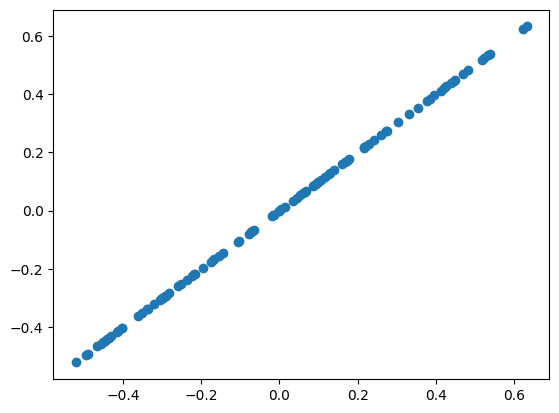

In [212]:
from sklearn.decomposition import PCA

X = 

pca = PCA(n_components=1)

principalComponents = pca.fit_transform(X)

plt.scatter(principalComponents[:,0],
            principalComponents[:,0])
plt.show()